###  Calculate Regression Statistics

In [102]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plb
import matplotlib.ticker as mtick
import scipy.stats as stats

In [105]:
combo8_df = pd.read_csv("Combined_Hosp_Drug_Util.csv")
combo8_df.count()

Unnamed: 0                   1509
Zip                          1509
County                       1509
State                        1509
Year                         1509
Total Pop                    1509
Male Pop                     1509
Pct Male                     1509
Female Pop                   1509
Pct Female                   1509
ADI State Rank               1509
ADI Natl Rank                1509
CA DOI Underserved Flag      1509
Tapestry Seg Nr              1509
Tapestry Seg Code            1509
Tapestry Seg Name            1509
Lifemode Code                1509
Lifemode Group               1509
AS Only                      1509
ED Only                      1509
Inpatient                    1509
Inpatient from ED            1509
Opioid Rx Count              1509
Pop w Opioid Rx              1509
Tot Opioid Rx Fills          1509
C2                           1509
C3                           1509
C4                           1509
C2-C4                        1509
AS per 1,000  

In [106]:
# Define variables from dataframe to use in regression analysis

# Independent Variables
ADI_State = list(combo8_df['ADI State Rank'])
ADI_Natl = list(combo8_df['ADI Natl Rank'])
Pct_Male = list(combo8_df['Pct Male'])
Tapestry_Seg = list(combo8_df['Tapestry Seg Nr'])
Lifemode = list(combo8_df['Lifemode Code'])
Opioid_Rx_per_1000 = list(combo8_df['Opioid Rx per 1,000'])
Opioid_Pop_per_1000 = list(combo8_df['Pop w Opioid Rx per 1,000'])

# Dependent Variables
C2_C4_per_1000 = list(combo8_df['C2-C4 per 1,000'])
C4_per_1000 = list(combo8_df['C4 per 1,000'])
C3_per_1000 = list(combo8_df['C3 per 1,000'])
C2_per_1000 = list(combo8_df['C2 per 1,000'])
IP_via_ED_per_1000 = list(combo8_df['IP via ED per 1,000'])
IP_per_1000 = list(combo8_df['IP per 1,000'])
ED_per_1000 = list(combo8_df['ED per 1,000'])
AS_per_1000 = list(combo8_df['AS per 1,000'])
Pct_IP_from_ED = list(combo8_df['Inpatient from ED']/combo8_df['Inpatient'])

In [148]:
stats.pearsonr(ADI_State, ED_per_1000)

(0.2591823766796118, 1.3789659843183073e-24)

In [147]:
# significant strong correlations (p<0.05)
stats.pearsonr(Tapestry_Seg, ED_per_1000)      #(0.1915, 6.2519e-14)
stats.pearsonr(Pct_Male, ED_per_1000)          #(0.1943, 2.6181e-14)
stats.pearsonr(ADI_State, Opioid_Rx_per_1000)  #(0.1978, 8.8970e-15)
stats.pearsonr(ADI_State, IP_via_ED_per_1000)  #(0.2559, 8.2774e-18)
stats.pearsonr(ADI_State, IP_per_1000)         #(0.4032, 5.3708e-44)

stats.pearsonr(ADI_State, ED_per_1000)         #(0.5211, 3.8904e-77)
adied_coeff = '{:0.2f}'.format(stats.pearsonr(ADI_State, ED_per_1000)[0])
#adied_pval = '{:.3e}'.format(stats.pearsonr(ADI_State, ED_per_1000)[1])

#stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)#(0.7902, 7.4e-323)
#oped_coeff = '{:0.2f}'.format(stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)[0])
#oped_pval = '{:.3e}'.format(stats.pearsonr(Opioid_Rx_per_1000, ED_per_1000)[1])
adied_coeff

'0.26'

In [143]:
# significant, but weak correlations (p<0.05, r2)
stats.pearsonr(ADI_State, C2_C4_per_1000)     #(-0.1056, 0.0004)
stats.pearsonr(ADI_State, C2_per_1000)        #(-0.0880, 0.0035)
stats.pearsonr(ADI_State, C3_per_1000)        #(-0.1139, 0.0001)
stats.pearsonr(ADI_State, C4_per_1000)        #(-0.1164, 0.0001)
stats.pearsonr(ADI_Natl, AS_per_1000)         #(-0.0743, 0.0139)
stats.pearsonr(ADI_State, Pct_IP_from_ED)     #(0.1203, 6.6731e-05)
stats.pearsonr(ADI_State, Opioid_Pop_per_1000)#(0.1201, 2.8861e-06)

# insignificant correlations (p>0.05)
stats.pearsonr(ADI_State, AS_per_1000)        #(-0.0581, 0.0547)

(0.010598147242533556, 0.6808053395975335)

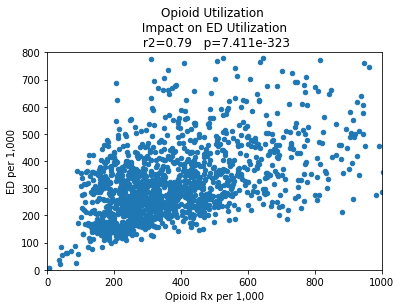

In [139]:
combo6_df.plot(x='Opioid Rx per 1,000', y='ED per 1,000', kind='scatter', xlim=(0,1000), ylim=(0,800),
               title=f'Opioid Utilization \n Impact on ED Utilization \n r2={oped_coeff}   p={oped_pval}')

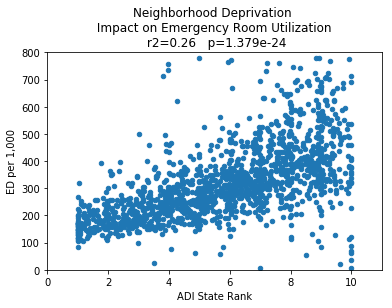

In [144]:
ax = combo8_df.plot(x='ADI State Rank', y='ED per 1,000', kind='scatter', xlim=(0,11), ylim=(0,800), 
                    title=f'Neighborhood Deprivation \n Impact on Emergency Room Utilization \n r2={adied_coeff}   p={adied_pval}')

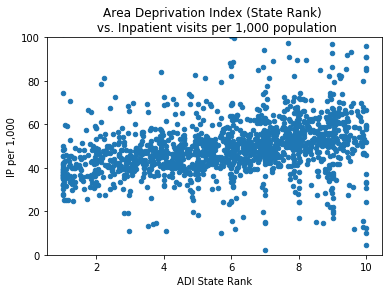

In [132]:
combo6_df.plot(x='ADI State Rank', y='IP per 1,000', kind='scatter', ylim=(0,100),
               title='Area Deprivation Index (State Rank) \n vs. Inpatient visits per 1,000 population')